# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
import cv2 as cv     # OpenCV for image processing
import os            # OS module to interact with the operating system
import tensorflow as tf  # TensorFlow for machine learning models
import matplotlib.pyplot as plt


2024-06-18 03:53:18.033215: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 03:53:18.033266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 03:53:18.034815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [4]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [5]:
## load dataset here
data = pd.read_csv("/kaggle/input/dataset/icml_face_data.csv")
data

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


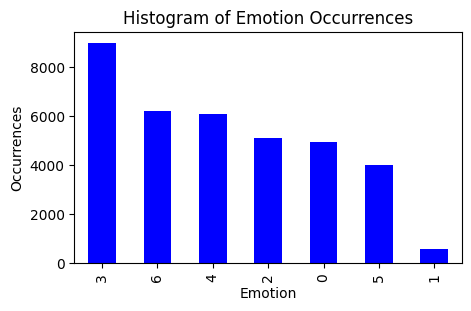

In [6]:
plt.figure(figsize=(5, 3))
emotion_counts = data["emotion"].value_counts()
emotion_counts.plot(kind='bar', color='blue')
plt.title('Histogram of Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Occurrences')
plt.show()

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [7]:
## parsing data here
images, labels = parse_data(data)

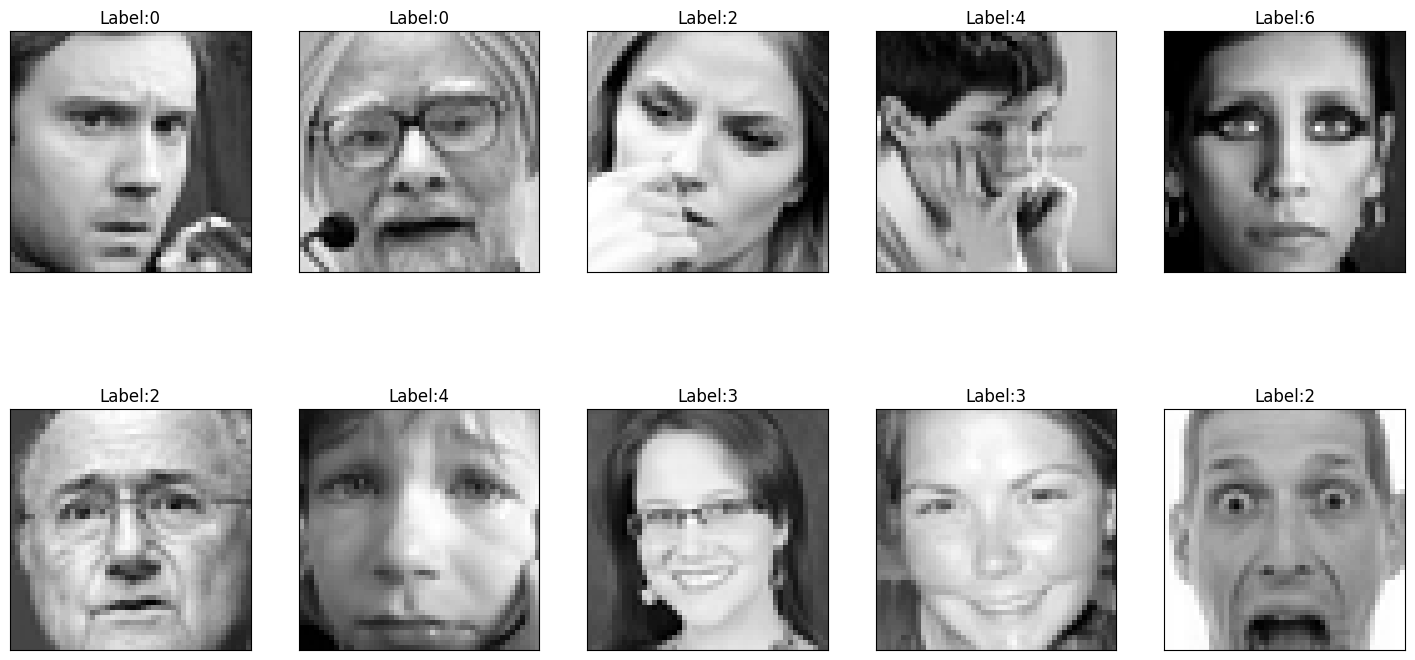

In [8]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

In [9]:
y = data["emotion"]
# X = data.drop(["emotion"], axis=1)
X = data['pixels'].apply(lambda x: np.fromstring(x, sep=' ')).tolist()

# Convert the list of lists to a numpy array
X = np.array(X)

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [10]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X)
pca

PCA(n_components=2)

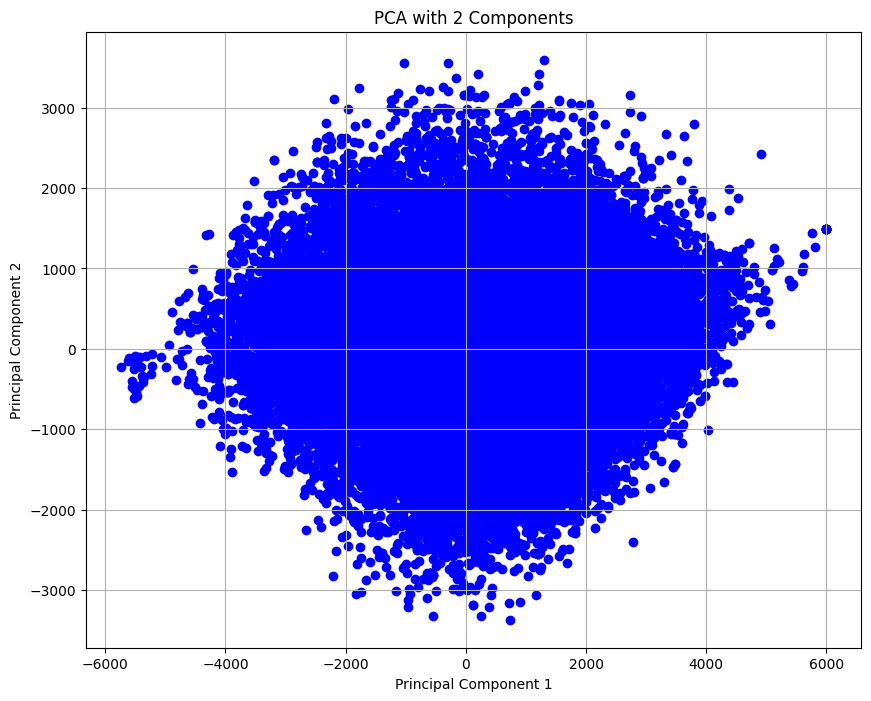

In [18]:
pca=pca.transform(X)
pca.shape
plt.figure(figsize=(10, 8))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c="blue", marker='o')
plt.title("PCA with 2 Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

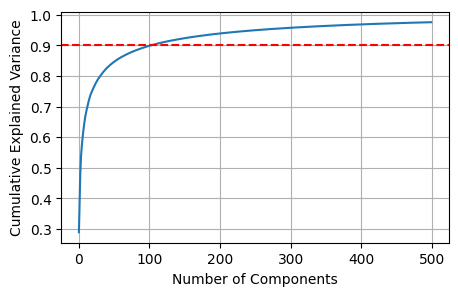

Top Cumulative Explained Variance:  0.9753815943866208


In [20]:
# Perform PCA
n_components = 500
pca = PCA(n_components=n_components)
pca.fit(X)

# Plot cumulative explained variance
threshold = 0.9
plt.figure(figsize=(5, 3))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.axhline(threshold, color='r', linestyle='--')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Print top cumulative explained variance
print("Top Cumulative Explained Variance: ", cumulative_sum[n_components-1])

*The core of PCA is the choice of the number of components k, which is investigated by cumulative explained variance ratio and evaluate it we can preserve the information of original data. The variance ratio is obtained by the singular values vector S as shown in the equation below:$$\frac{\displaystyle \sum_{i=1}^{k}S_{i}}{\displaystyle \sum_{i=1}^{n}S_{i}}$$Where k is the number of components (k-dimensions) and n is the number of features. The choice of k is done by selection of the smallest values of k, which has a variance ratio higher than a specific threshold.*

In [21]:
n_components = 100
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=100)

In [22]:
principal_components = pca.transform(X)

In [23]:
pc_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,691.750859,-442.328649,-864.125553,389.987453,-511.411672,127.585443,106.166386,-52.826668,85.209730,152.914880,...,-78.795504,36.335435,61.183443,15.092775,94.366363,34.054749,16.987515,-137.044645,-161.492179,-76.498382
1,-62.025489,561.762207,565.149735,455.007830,-686.491870,91.659218,485.512104,142.392073,-86.236961,192.286571,...,37.822822,-44.866776,2.952746,-164.164661,83.327398,-92.723832,-19.569586,-32.625797,2.186519,-26.875044
2,-1322.538070,-415.729686,-1930.813479,-268.862098,-810.788511,-951.422629,-1100.750593,285.101932,-318.091258,-58.438839,...,58.489630,-4.333893,-42.924140,150.960159,-78.846278,38.289763,-33.902673,-11.345519,-212.325636,-98.047556
3,-232.277887,656.803932,1417.060237,-1411.819979,736.970356,-27.561186,-971.055416,-661.773377,-275.999086,-251.127226,...,-67.378098,92.606366,-37.003214,70.853169,-40.924340,0.263918,114.693367,-62.094090,140.878034,-11.061322
4,1796.585834,-2005.093949,305.005651,-17.154925,-349.092367,-693.297635,-50.472897,28.735146,354.100711,570.006557,...,-29.280603,-117.331689,-54.766308,-19.385075,22.918528,-19.665438,23.853452,123.885380,-47.594493,-46.307106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,3033.753533,481.233810,1276.661224,-300.011563,-658.702231,458.338760,578.923949,96.280597,-250.281859,-43.548122,...,4.281307,26.274870,-62.526526,26.048960,14.535554,-67.891892,35.357578,73.882536,48.484631,-70.485288
35883,-2074.831840,167.194818,-305.062004,297.582175,349.849567,-72.597087,14.591483,-422.658345,-64.036339,-178.440724,...,-2.504632,65.717582,70.010760,6.210335,-40.294921,112.717182,1.177072,-53.716579,-15.291025,-78.784749
35884,-1289.155652,-1408.568320,411.251518,-1078.462314,827.785622,385.124107,47.818907,-9.396568,189.472077,-811.459322,...,13.693201,55.399479,-140.569944,16.830858,64.709354,16.495917,-10.926281,90.704576,-49.808926,52.159572
35885,2008.413571,-125.610909,-502.706081,352.313999,-195.174302,179.763927,-504.486495,210.810344,62.214385,-954.060154,...,-52.950585,-6.556884,80.777013,-65.213972,-20.558119,-124.764462,-64.179198,44.866700,18.460837,4.626579


In [24]:
pc_df["target"] = y.to_list()

In [25]:
pc_df.to_csv("principal_components_with_labels.csv", index=False)

In [26]:
import joblib

joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

Transformed data

In [27]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
data = pd.read_csv('principal_components_with_labels.csv')
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,target
0,691.750859,-442.328649,-864.125553,389.987453,-511.411672,127.585443,106.166386,-52.826668,85.209730,152.914880,...,36.335435,61.183443,15.092775,94.366363,34.054749,16.987515,-137.044645,-161.492179,-76.498382,0
1,-62.025489,561.762207,565.149735,455.007830,-686.491870,91.659218,485.512104,142.392073,-86.236961,192.286571,...,-44.866776,2.952746,-164.164661,83.327398,-92.723832,-19.569586,-32.625797,2.186519,-26.875044,0
2,-1322.538070,-415.729686,-1930.813479,-268.862098,-810.788511,-951.422629,-1100.750593,285.101932,-318.091258,-58.438839,...,-4.333893,-42.924140,150.960159,-78.846278,38.289763,-33.902673,-11.345519,-212.325636,-98.047556,2
3,-232.277887,656.803932,1417.060237,-1411.819979,736.970356,-27.561186,-971.055416,-661.773377,-275.999086,-251.127226,...,92.606366,-37.003214,70.853169,-40.924340,0.263918,114.693367,-62.094090,140.878034,-11.061322,4
4,1796.585834,-2005.093949,305.005651,-17.154925,-349.092367,-693.297635,-50.472897,28.735146,354.100711,570.006557,...,-117.331689,-54.766308,-19.385075,22.918528,-19.665438,23.853452,123.885380,-47.594493,-46.307106,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,3033.753533,481.233810,1276.661224,-300.011563,-658.702231,458.338760,578.923949,96.280597,-250.281859,-43.548122,...,26.274870,-62.526526,26.048960,14.535554,-67.891892,35.357578,73.882536,48.484631,-70.485288,6
35883,-2074.831840,167.194818,-305.062004,297.582175,349.849567,-72.597087,14.591483,-422.658345,-64.036339,-178.440724,...,65.717582,70.010760,6.210335,-40.294921,112.717182,1.177072,-53.716579,-15.291025,-78.784749,3
35884,-1289.155652,-1408.568320,411.251518,-1078.462314,827.785622,385.124107,47.818907,-9.396568,189.472077,-811.459322,...,55.399479,-140.569944,16.830858,64.709354,16.495917,-10.926281,90.704576,-49.808926,52.159572,0
35885,2008.413571,-125.610909,-502.706081,352.313999,-195.174302,179.763927,-504.486495,210.810344,62.214385,-954.060154,...,-6.556884,80.777013,-65.213972,-20.558119,-124.764462,-64.179198,44.866700,18.460837,4.626579,3


In [29]:
print(len(data))

35887


In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

### SVM model

In [31]:
clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", svm.SVC(kernel="rbf", C=5, probability=True, verbose=True))
])
clf_rbf.fit(train_data.values, train_labels.values)

[LibSVM]...*..*
optimization finished, #iter = 5324
obj = -1155.555318, rho = 0.991933
nSV = 1764, nBSV = 91
Total nSV = 1764
...*..*
optimization finished, #iter = 5498
obj = -1271.407478, rho = 0.985367
nSV = 1859, nBSV = 103
Total nSV = 1859
...*..*
optimization finished, #iter = 5699
obj = -1226.988555, rho = 1.028211
nSV = 1829, nBSV = 97
Total nSV = 1829
...*..*
optimization finished, #iter = 5472
obj = -1228.720528, rho = 1.027119
nSV = 1815, nBSV = 111
Total nSV = 1815
...*..*
optimization finished, #iter = 5647
obj = -1258.025390, rho = 0.998326
nSV = 1818, nBSV = 103
Total nSV = 1818
....*..*
optimization finished, #iter = 6779
obj = -1517.267253, rho = -1.014622
nSV = 2184, nBSV = 129
..............*.....*
optimization finished, #iter = 19849
obj = -7239.230274, rho = 0.031006
nSV = 5736, nBSV = 697
Total nSV = 5736
.............*......*
optimization finished, #iter = 19785
obj = -7298.080786, rho = 0.000693
nSV = 5727, nBSV = 704
Total nSV = 5727
..............*.....*
optim

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, probability=True, verbose=True))])

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [32]:
y_train_pred = cross_val_predict(clf_rbf, train_data, train_labels, cv=5)

[LibSVM]..*..*
optimization finished, #iter = 4398
obj = -965.391119, rho = 0.990834
nSV = 1499, nBSV = 72
Total nSV = 1499
..*..*
optimization finished, #iter = 4178
obj = -922.804438, rho = 1.015999
nSV = 1431, nBSV = 61
Total nSV = 1431
..*..*
optimization finished, #iter = 4262
obj = -947.298109, rho = 0.947547
nSV = 1507, nBSV = 70
Total nSV = 1507
..*..*
optimization finished, #iter = 4443
obj = -955.122291, rho = 1.002627
nSV = 1530, nBSV = 72
Total nSV = 1530
...*.*
optimization finished, #iter = 4453
obj = -963.944466, rho = 1.009784
nSV = 1521, nBSV = 72
Total nSV = 1521
...*..*
optimization finished, #iter = 5411
obj = -1174.847173, rho = -1.003432
nSV = 1812, nBSV = 88
...........*....*
optimization finished, #iter = 15711
obj = -5745.122536, rho = 0.022243
nSV = 4648, nBSV = 532
Total nSV = 4648
...........*....*
optimization finished, #iter = 15366
obj = -5683.724453, rho = -0.021195
nSV = 4638, nBSV = 515
Total nSV = 4638
...........*....*
optimization finished, #iter = 

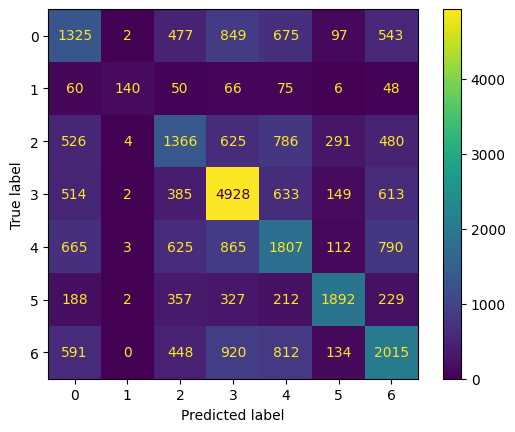

In [33]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=clf_rbf.classes_).plot()

In [36]:
from sklearn.metrics import classification_report
report = classification_report(train_labels,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.34      0.33      0.34      3968
           1       0.92      0.31      0.47       445
           2       0.37      0.33      0.35      4078
           3       0.57      0.68      0.62      7224
           4       0.36      0.37      0.37      4867
           5       0.71      0.59      0.64      3207
           6       0.43      0.41      0.42      4920

    accuracy                           0.47     28709
   macro avg       0.53      0.43      0.46     28709
weighted avg       0.47      0.47      0.47     28709

